# 3/21
1. Find entropy in order to characterize attributes by most informative
2. Experiment with uniqueness

## Finding Most Informative Metrics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import rel_entr
from math import isinf

In [3]:
################## DATA FRAME ##################
datafile = 'Data/Fitbit_Kaggle/dailyActivity_merged.csv'
fields = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 
          'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 
          'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
all_IDs = df.Id.unique()
num_users = int(len(all_IDs))
my_cols = df.columns[2:]

In [5]:
my_hist_bins = [0] * len(my_cols)
for i in range(len(my_hist_bins)):
    my_hist_bins[i] = [0] * num_users

for i in range(len(my_cols)):
    for j, user in enumerate(all_IDs):
        temp_df = df.loc[df['Id'] == user]
        edited_df = temp_df[temp_df[my_cols[i]] !=0]

        my_series = edited_df[my_cols[i]]
        count, division = np.histogram(my_series)
        my_hist_bins[i][j] = count/sum(count)
        #caloric_series.hist(bins=division)

C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [6]:
distance_matrix = np.zeros((len(my_cols), num_users, num_users))
dms = distance_matrix.shape
avg_dist_lst = np.zeros((1, dms[0]))

for z in range(len(my_cols)):
    for i in range(num_users-1):
        for j in range(num_users-1):
            distance_matrix[z, i, j] = sum(rel_entr(np.array(my_hist_bins[z][i]),np.array(my_hist_bins[z][j])))
            if np.isinf(distance_matrix[z, i, j]):
                distance_matrix[z, i, j] = 0
            if np.isnan(distance_matrix[z, i, j]):
                distance_matrix[z, i, j] = 0
    avg_dist_lst[0, z] = np.average(distance_matrix[z])

In [7]:
avg_dist_dict = dict(zip(my_cols, avg_dist_lst[0]))
print(avg_dist_dict.items())

dict_items([('TotalSteps', 0.1755775164428969), ('TotalDistance', 0.19994318296652075), ('TrackerDistance', 0.19918965580706682), ('VeryActiveDistance', 0.2731360403195777), ('ModeratelyActiveDistance', 0.23293366398305493), ('LightActiveDistance', 0.24231369567314384), ('SedentaryActiveDistance', 0.010114049684333635), ('VeryActiveMinutes', 0.2890269858030327), ('FairlyActiveMinutes', 0.26617139384740085), ('LightlyActiveMinutes', 0.14467511493040616), ('SedentaryMinutes', 0.13966970827351677), ('Calories', 0.21871800803684954)])


C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


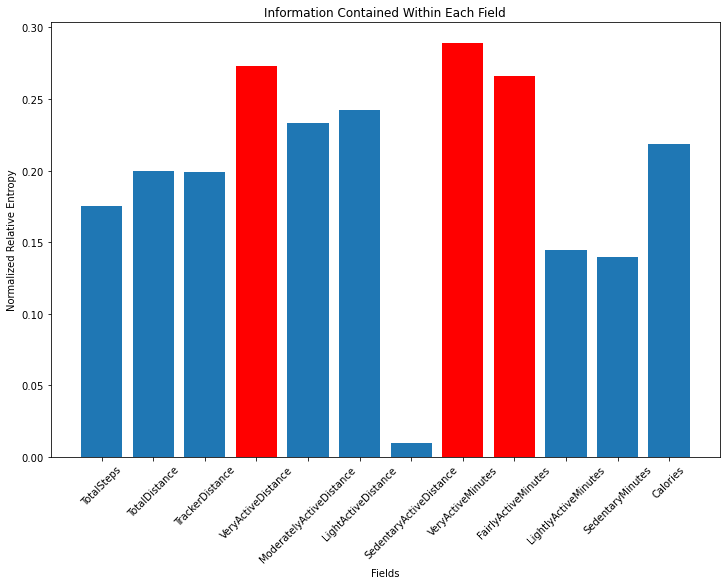

In [15]:
my_keys = avg_dist_dict.keys()
my_values = avg_dist_dict.values()
my_select_keys = ["FairlyActiveMinutes", "VeryActiveMinutes", "VeryActiveDistance"]
my_select_values = [0.2662, 0.2891, 0.2732]

plt.figure(figsize=(12,8))
labels = my_keys
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=45)
plt.bar(my_keys, my_values)
plt.bar(my_select_keys, my_select_values, color="red")
plt.title('Information Contained Within Each Field')
plt.ylabel('Normalized Relative Entropy')
plt.xlabel('Fields')
plt.show()

In [7]:
dist_std = np.std(distance_matrix)
print(dist_std)
print(dist_std*3)

0.44989156438357863
1.349674693150736


In [8]:
np.average(np.array(avg_dist_lst))

0.19928908464731668

> **Conclusion:** As can be seen above, the highest values are 0.289, 0.273, and 0.266, for the following fields, respectively: 'FairlyActiveMinutes', 'VeryActiveDistance', and 'LightlyActiveMinutes'.  Calories and total steps were both relatively uninformative.

## (Too) Early Attempt at Reidentification

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import rel_entr
from math import isinf

In [79]:
################## DATA FRAME ##################
datafile = 'Data/Fitbit_Kaggle/dailyActivity_merged.csv'
fields = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 
          'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 
          'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863


In [80]:
unknown_df = pd.DataFrame()
index_list = [0,1,6,12,14,19,22,23,28]

for my_index in index_list:
    unknown_df = unknown_df.append(df.iloc[my_index],ignore_index=True)
    #df = df.drop(my_index)
    
unknown_df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1.503960e+09,4/12/2016,13162.0,8.50,8.50,1.88,0.55,6.06,25.0,13.0,328.0,728.0,1985.0
1,1.503960e+09,4/13/2016,10735.0,6.97,6.97,1.57,0.69,4.71,21.0,19.0,217.0,776.0,1797.0
2,1.503960e+09,4/18/2016,13019.0,8.59,8.59,3.25,0.64,4.71,42.0,16.0,233.0,1149.0,1921.0
3,1.503960e+09,4/24/2016,10039.0,6.41,6.41,2.92,0.21,3.28,39.0,5.0,238.0,709.0,1788.0
4,1.503960e+09,4/26/2016,13755.0,8.79,8.79,2.33,0.92,5.54,31.0,23.0,279.0,833.0,1970.0
5,1.503960e+09,5/1/2016,10602.0,6.81,6.81,2.29,1.60,2.92,33.0,35.0,246.0,730.0,1820.0
6,1.503960e+09,5/4/2016,11100.0,7.15,7.15,2.46,0.87,3.82,36.0,22.0,203.0,1179.0,1819.0
7,1.503960e+09,5/5/2016,14070.0,8.90,8.90,2.92,1.08,4.88,45.0,24.0,250.0,857.0,1959.0
8,1.503960e+09,5/10/2016,12207.0,7.77,7.77,3.35,1.16,3.26,46.0,31.0,214.0,746.0,1859.0


In [81]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,3.19,0.78,2.51,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,3.25,0.64,4.71,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,3.53,1.32,5.03,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,1.96,0.48,4.24,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,1.34,0.35,4.65,19,8,211,838,1775


In [82]:
avg_fields = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 
          'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 
          'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

all_IDs = df.Id.unique()
num_users = len(all_IDs)

user_dict = dict()
for idx, user in enumerate(all_IDs):
    temp_df = df.loc[df['Id'] == user]
    user_dict[user] = np.round(temp_df[avg_fields].mean(), 3)

avg_df = pd.DataFrame(user_dict.values(), index=user_dict.keys())
print("AVERAGE OF EACH FIELD FOR EACH USER")
avg_df.head()

AVERAGE OF EACH FIELD FOR EACH USER


,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,12116.742,7.810,7.810,2.858,0.794,4.153,38.710,19.161,219.935,848.161,1816.419
1624580081,5743.903,3.915,3.915,0.939,0.361,2.607,8.677,5.806,153.484,1257.742,1483.355
1644430081,7282.967,5.295,5.295,0.730,0.951,3.609,9.567,21.367,178.467,1161.867,2811.300
1844505072,2580.065,1.706,1.706,0.008,0.049,1.647,0.129,1.290,115.452,1206.613,1573.484
1927972279,916.129,0.635,0.635,0.096,0.031,0.507,1.323,0.774,38.581,1317.419,2172.806


In [83]:
# Wouldn't actually know the user num, but it doesn't really matter here, it's just the index
# unknown_user = 1503960366

avg_unknown_df = pd.DataFrame()
avg_unknown_df = avg_unknown_df.append(np.round(unknown_df[avg_fields].mean(), 3), ignore_index=True)
print("AVERAGE OF UNKNOWN FIELDS (ASSUMING IT IS ONE PERSON)")
avg_unknown_df.head()

AVERAGE OF UNKNOWN FIELDS (ASSUMING IT IS ONE PERSON)


,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,12076.556,7.766,7.766,2.552,0.858,4.353,35.333,20.889,245.333,856.333,1879.778


Define vector norm distance measures

In [127]:
difference = np.zeros((len(avg_df.index), len(avg_fields)))
L2_norm = np.zeros((len(avg_df.index), len(avg_fields)))
updated_L2 = np.zeros((len(avg_df.index)))

for idx1, user in enumerate(avg_df.index):
    for idx2, field in enumerate(avg_fields):
        base_attr = avg_df.loc[user, field]
        unknown_attr = avg_unknown_df[field][0]

        # Calculate each distance as the unknown vs a known, for each known, for each field
        difference[idx1, idx2] = abs(unknown_attr - base_attr)#/unknown_attr
        L2_norm[idx1, idx2] = np.sqrt((base_attr**2) + (unknown_attr**2))
        updated_L2[idx1] += (base_attr**2) + (unknown_attr**2)
        
final_L2 = np.sqrt(updated_L2)

In [128]:
my_diff_mins = difference.min(axis=1)

my_diff_min = my_diff_mins.min()
print(my_diff_min)

pred_index_dif = list(my_diff_mins).index(my_diff_min)
print(pred_index_dif)

0.043999999999999595
0


THIS IS INVESTIGATING THE MINIMUM VALUE FOR EACH ROW (USER)

In [130]:
my_diff_mins[0] = 100
my_diff_min = my_diff_mins.min()
print(my_diff_min)
pred_index_dif = list(my_diff_mins).index(my_diff_min)
print(pred_index_dif)

my_diff_mins[15] = 100
my_diff_min = my_diff_mins.min()
print(my_diff_min)
pred_index_dif = list(my_diff_mins).index(my_diff_min)
print(pred_index_dif)

my_diff_mins[29] = 100
my_diff_min = my_diff_mins.min()
print(my_diff_min)
pred_index_dif = list(my_diff_mins).index(my_diff_min)
print(pred_index_dif)

0.04800000000000004
29
0.04800000000000004
29
0.08499999999999996
26


In [49]:
min_L2 = min(final_L2)
print(min_L2)
min_L2_idx = list(final_L2).index(min_L2)
print(min_L2_idx)

12548.687549894492
4


In [51]:
final_L2[4] = 10000000000000
min_L2 = final_L2.min()
print(min_L2)
min_L2_idx = list(final_L2).index(min_L2)
print(min_L2_idx)

final_L2[31] = 10000000000000
min_L2 = final_L2.min()
print(min_L2)
min_L2_idx = list(final_L2).index(min_L2)
print(min_L2_idx)

12593.3363659381
31
12679.66631436482
3


For L2 norms, the current approach shows that the following field is being used to match: ModeratelyActiveDistance.  Also, note that all the user estimates are incorrect (correct user is user 0).  Thus, let's try using KL-divergence like we did earlier to see if that works better.  In theory this should work perfectly since they do actually come from the same distribution.

In [52]:
# Taken from above

all_IDs = df.Id.unique()
num_users = int(len(all_IDs))
my_cols = df.columns[2:]

my_hist_bins = [0] * len(my_cols)
for i in range(len(my_hist_bins)):
    my_hist_bins[i] = [0] * num_users

for i in range(len(my_cols)):
    for j, user in enumerate(all_IDs):
        temp_df = df.loc[df['Id'] == user]
        edited_df = temp_df[temp_df[my_cols[i]] !=0]

        my_series = edited_df[my_cols[i]]
        count, division = np.histogram(my_series)
        my_hist_bins[i][j] = count/sum(count)
        #caloric_series.hist(bins=division)

In [53]:
num_unknown_users = 1

In [98]:
# Make hist_bins for unknown
my_unknown_hist_bins = [0] * len(my_cols)
for i in range(len(my_unknown_hist_bins)):
    my_unknown_hist_bins[i] = 0 #[0] * num_unknown_users

    
# Loop through each field and then each user
# For each field
for i in range(len(my_cols)):
    my_col = my_cols[i]
    # For each user
    for j, user in enumerate(all_IDs):
        # Isolate the given user
        temp_df = df.loc[df['Id'] == user]
        #edited_df = 
        #temp_df[temp_df[my_cols[i]] == 0]
        #DataFrame.loc[condition, column_name] = new_value
        temp_df.loc[temp_df[my_col]==0, my_col] = 100000000

        my_series = temp_df[my_cols[i]]
        count, division = np.histogram(my_series)
        my_unknown_hist_bins[i] = count/sum(count)  #[j]
        #caloric_series.hist(bins=division)

In [99]:
temp_df.head(100)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
909,8877689391,4/12/2016,23186,20.400000,20.400000,12.22,0.34,7.82,85,7,312,1036,3921
910,8877689391,4/13/2016,15337,9.580000,9.580000,3.55,0.38,5.64,108,18,216,1098,3566
911,8877689391,4/14/2016,21129,18.980000,18.980000,10.55,0.59,7.75,68,13,298,1061,3793
912,8877689391,4/15/2016,13422,7.170000,7.170000,0.05,0.05,7.01,106,1,281,1052,3934
913,8877689391,4/16/2016,29326,25.290001,25.290001,13.24,1.21,10.71,94,29,429,888,4547
914,8877689391,4/17/2016,15118,8.870000,8.870000,0.00,0.07,8.79,58,15,307,1060,3545
915,8877689391,4/18/2016,11423,8.670000,8.670000,2.44,0.27,5.94,29,5,191,1215,2761
916,8877689391,4/19/2016,18785,17.400000,17.400000,12.15,0.18,5.03,82,13,214,1131,3676
917,8877689391,4/20/2016,19948,18.110001,18.110001,11.02,0.69,6.34,73,19,225,1123,3679
918,8877689391,4/21/2016,19377,17.620001,17.620001,12.29,0.42,4.89,82,13,226,1119,3659


In [100]:
similarity_matrix = np.zeros((len(my_cols), num_users, num_unknown_users))
sms = similarity_matrix.shape
avg_sim_lst = np.zeros((sms[0]))

for z in range(len(my_cols)):
    for i in range(num_users-1):
        for j in range(num_unknown_users):
            similarity_matrix[z, i, j] = sum(rel_entr(np.array(my_hist_bins[z][i]),np.array(my_unknown_hist_bins[z][j])))
            if np.isinf(similarity_matrix[z, i, j]):
                similarity_matrix[z, i, j] = 100
            if np.isnan(similarity_matrix[z, i, j]):
                similarity_matrix[z, i, j] = 100
    avg_sim_lst[z] = np.average(similarity_matrix[z])

In [101]:
avg_sim_lst

array([ 1.49085739,  1.48803875,  1.48965067, -1.33762894, -1.51720073,
        0.76723447, -1.40900983, -1.55937116,  0.77967644,  1.73215258,
        1.72713726])

In [102]:
most_sim_value = min(abs(avg_sim_lst))
most_sim_value

0.76723446523801

In [103]:
try:
    estimated_user = list(avg_sim_lst).index(most_sim_value)
except ValueError:
    estimated_user = list(avg_sim_lst).index(-most_sim_value)
estimated_user

5

In [104]:
ri_avg_df = avg_df.reset_index()
ri_avg_df = ri_avg_df.append(avg_unknown_df, ignore_index=True)
unknown_user = 33
ri_avg_df.iloc[[0,estimated_user, 32, unknown_user]]
#ri_avg_df.head(100)

,index,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1.503960e+09,12116.742,7.810,7.810,2.858,0.794,4.153,38.710,19.161,219.935,848.161,1816.419
5,2.022484e+09,11370.645,8.084,8.084,2.422,0.720,4.943,36.290,19.355,257.452,1112.581,2509.968
32,8.877689e+09,16040.032,13.213,13.213,6.637,0.338,6.189,66.065,9.935,234.710,1112.871,3420.258
33,NaN,12076.556,7.766,7.766,2.552,0.858,4.353,35.333,20.889,245.333,856.333,1879.778


Focus just on the items we found to have the most information

In [116]:
similarity_VAD_series = abs(similarity_matrix[3])
min_VAD = min(similarity_VAD_series)
print(min_VAD)
min_VAD_idx = list(similarity_VAD_series).index(min_VAD)
print(min_VAD_idx)

[0.]
32


In [115]:
ri_avg_df.loc[ri_avg_df["VeryActiveDistance"]>2, "VeryActiveDistance"]

0     2.858
5     2.422
20    3.114
25    2.415
26    2.781
27    8.515
28    2.214
29    2.504
32    6.637
33    2.552
Name: VeryActiveDistance, dtype: float64